In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
selectedColumns = data[['workclass', 'education', 'occupation',  'relationship', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']]
X = pd.get_dummies(selectedColumns, columns = ['workclass', 'education', 'occupation',  'relationship', 'gender'])

del X['income']
X.head()

,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,gender_Female,gender_Male
0,0,0,40,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,50,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,40,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,7688,0,40,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,30,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['income'])
y = pd.Series(data = le.transform(data['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def show_auc(y, y_pred, plot_label = ''):    
    fpr, tpr, _ = roc_curve(y, y_pred)
    auc_val = auc(fpr, tpr)
    print('ROC AUC', plot_label, ': {0:.4f}'.format(auc_val))
    plt.plot(fpr, tpr, label=plot_label)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    return auc_val

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C = 15)
model.fit(X_train, y_train)
y_pred_LR = model.predict_proba(X_test)[:,1]

#show_auc(y_test, y_pred)

In [30]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 50)
model.fit(X_train, y_train)
y_pred_RF = model.predict_proba(X_test)[:,1]

#show_auc(y_test, y_pred)

In [31]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred_DT = model.predict_proba(X_test)[:,1]

#show_auc(y_test, y_pred)

ROC AUC LogisticRegression : 0.9043
ROC AUC RandomForestClassifier : 0.8928
ROC AUC DecisionTreeClassifier : 0.8438


0.8437879629191724

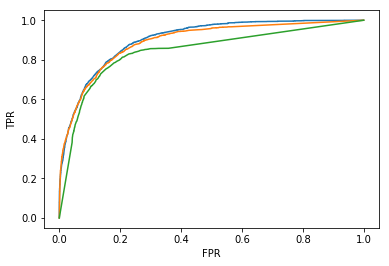

In [34]:
show_auc(y_test, y_pred_LR, 'LogisticRegression')
show_auc(y_test, y_pred_RF, 'RandomForestClassifier')
show_auc(y_test, y_pred_DT, 'DecisionTreeClassifier')